# Figures for *deep-GMF* project

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.facecolor'] = 'white'
#plt.style.use('white_background')

## Data import

In [109]:
model = 'ResNet10'
dataset = 'fewIDmanyIMG'
target = 'id'
df = pd.read_csv(f'../results/{model}_dataset-{dataset}_target-{target}.tsv', sep='\t')
df = df.dropna(axis=0)
df = df.groupby(['factor', 'op_nr']).max().reset_index()
history = pd.read_csv(f'../trained_models/{model}_dataset-{dataset}_target-{target}/history.csv')

In [110]:
df

,factor,op_nr,corr,feature_nr,layername,layer,operation
0,id,0,0.155469,0,layer0_input,0,input
1,id,1,0.138672,0,layer1_conv,1,conv
2,id,2,0.269141,0,layer2_block-1_conv,2,conv
3,id,3,0.345313,0,layer3_block-1_conv,3,conv
4,id,4,0.486328,0,layer4_block-2_conv,4,conv
...,...,...,...,...,...,...,...
83,zr,6,0.779751,0,layer6_block-3_conv,6,conv
84,zr,7,0.783905,0,layer7_block-3_conv,7,conv
85,zr,8,0.764251,0,layer8_block-4_conv,8,conv
86,zr,9,0.740714,0,layer9_block-4_conv,9,conv


(-0.05, 11.0)

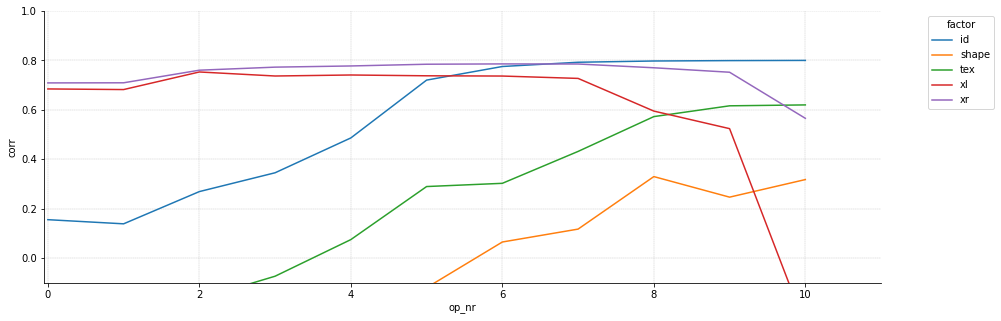

In [111]:
factors = ['id', 'background', 'xr', 'xl', 'shape', 'tex']

fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.lineplot(x='op_nr', y='corr', hue='factor', ax=ax, data=df.query("factor in @factors"))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
sns.despine()

ax.grid(ls='--', lw=0.35)
ax.set_ylim(-0.1, 1)
ax.set_xlim(-.05, df['op_nr'].max() + 1)

In [100]:
df.query("factor == 'shape' & layer == 9")

,corr,factor,feature_nr,layername,layer,operation,op_nr
21300,-0.595385,shape,0,layer9_block-4_conv,9,conv,9
21301,-3.214848,shape,1,layer9_block-4_conv,9,conv,9
21302,-0.809439,shape,2,layer9_block-4_conv,9,conv,9
21303,-0.383123,shape,3,layer9_block-4_conv,9,conv,9
21304,-2.200803,shape,4,layer9_block-4_conv,9,conv,9
...,...,...,...,...,...,...,...
24055,-1.865087,shape,389,layer9_globalpool,9,globalpool,10
24056,-7.729068,shape,390,layer9_globalpool,9,globalpool,10
24057,-0.551251,shape,391,layer9_globalpool,9,globalpool,10
24058,-0.391845,shape,392,layer9_globalpool,9,globalpool,10


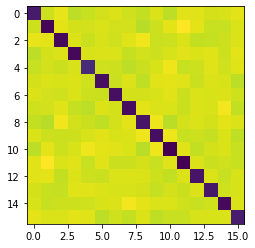

In [58]:
rdm_n = np.load(f'../results/{model}_dataset-{dataset}_target-id_epoch-005_rdm-neural.npz')
rdm_f = np.load(f'../results/{model}_dataset-{dataset}_target-id_epoch-005_rdm-feature.npz')

plt.imshow(rdm_f['tex'])
#plt.imshow(rdm_f['id'])

In [36]:
facs = ['bg', 'l', 'xt', 'xr', 'id']
this_df = df.query("factor in @facs")
ops = ['input', 'conv', 'globalpool', 'logits']
this_df = this_df.query("operation in @ops")
rdm_n = np.load(f'../results/{model}_dataset-{dataset}_target-id_rdm-neural.npz')
rdm_f = np.load(f'../results/{model}_dataset-{dataset}_target-id_rdm-feature.npz')

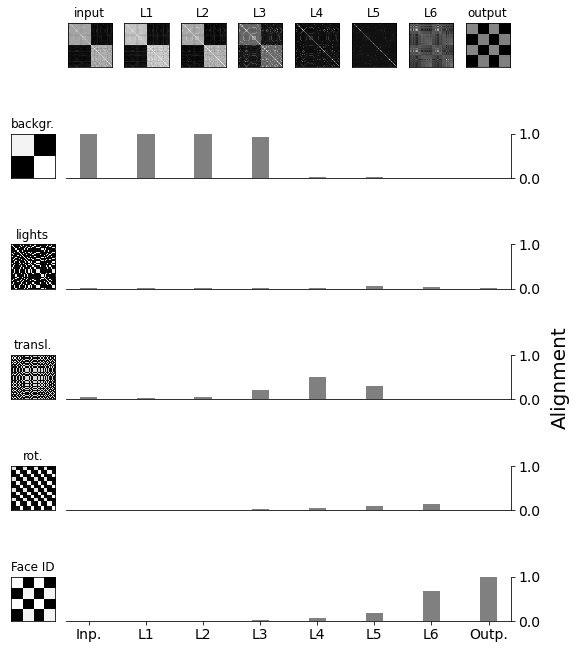

In [68]:
n_layers = this_df['layername'].nunique()
n_factors = this_df['factor'].nunique()

fig = plt.figure(constrained_layout=False, figsize=(n_layers + 1, n_factors + 6))
gs = fig.add_gridspec(nrows=n_factors + 1, ncols=n_layers + 1)
ax = fig.add_subplot(gs[0, 0])
ax.axis('off')

for i, lay in enumerate(this_df['layername'].unique()):
    ax = fig.add_subplot(gs[0, i+1])
    rdm = rdm_n[lay]
    ax.imshow(rdm, cmap='gray', interpolation='none')
    ax.set_xticks([])
    ax.set_yticks([])
    
    if 'input' in lay:
        name = 'input'
    elif 'id' in lay:
        name = 'output'
    else:
        name = f'L{i}'
        #name = f"{lay.split('_')[-1]} ({lay.split('_')[0].split('-')[1]})"

    ax.set_title(name)
    
for i, f in enumerate(facs):
    ax = fig.add_subplot(gs[i+1, 0])
    rdm = rdm_f[f]
    ax.imshow(rdm, cmap='gray', interpolation='none')
    ax.set_title({'bg': 'backgr.', 'xt': 'transl.', 'xr': 'rot.', 'l': 'lights', 'id': 'Face ID'}[f])
    ax.set_xticks([])
    ax.set_yticks([])

    ax = fig.add_subplot(gs[i+1, 1:])
    vals = this_df.query("factor == @f")
    ax.bar(range(vals['corr'].size), vals['corr'], width=0.3, color='gray')
    ax.set_ylim(0, 1.)
    ax.set_xlim(-0.4, 7.4)
    if i == 2:
        ax.set_ylabel('Alignment', fontsize=20, labelpad=10)
    
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if i != len(facs) - 1:
        ax.set_xticks([])#labels([])
    else:
        ax.set_xticks(range(8))
        ax.set_xticklabels(['Inp.', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'Outp.'], fontsize=14)
        #ax.set_xlabel('Layer', fontsize=20)
        
    ax.set_yticks([0., 1.])
    ax.set_yticklabels([0., 1.], fontsize=14)

fig.subplots_adjust(hspace=1.5)
fig.savefig(f'test.png', dpi=300, bbox_inches='tight')